# Sentiment Analysis Notebook

#### This notebook contains a demonstration of the tools necessary for conducting descriptive analysis of the data. This includes things such as frequency analysis, descripting statistics and temporal frequency.

In [11]:
import trt_API.process as proc
import trt_API.analysis as ana
import trt_API.sentiment as sent
from pathlib import Path
import pandas as pd
import datetime
SORTED = False
pd.set_option('display.max_rows', 500)

## Variables for Analysis

In [40]:
# Set the path to the parent directory containing all Tweets of interest
DIRECTORY = './tweets/*'
# Set to True to isolate english language tweets
ENGLISH = False


## Load Tweet and Generate Dataframe

In [41]:
tweet_objects = proc.loadTweetObjects(DIRECTORY)
print(len(tweet_objects))
df = proc.convertTweetsToDataframe(tweet_objects, ENGLISH)
print(df)    

15300
Loaded utf-8 df.
Initial size: 15298
Dropping duplicates...
Final size: 10101
                          date  followers        username  \
0      Jun 01 20:02:51 2018\t0         88       Yohanan_L   
1      Jun 01 22:19:01 2018\t0        464       Kiakkye30   
2      Jun 08 00:04:48 2018\t0       1019       KessprdGB   
3      Jun 08 03:27:48 2018\t0         24  quynhnguyen153   
4      Jun 08 07:44:53 2018\t0          1       mlqbuot27   
...                        ...        ...             ...   
15286  Jun 27 19:15:03 2018\t0      99303  General_Sharaf   
15288  Jun 27 19:18:51 2018\t0      33365      IlseHorann   
15290  Jun 27 19:21:41 2018\t0       8250       Tulip_360   
15292  Jun 27 20:43:10 2018\t0          5   bubbIefxck124   
15296  Jun 27 23:26:48 2018\t0       1498       itsdafnet   

                       location  \
0                        France   
1                         Haiti   
2                          None   
3                          None   
4      ก

## Extract Potential Cashtags

In [42]:
ctdf = proc.extractPossibleCashtags(df)

Total potential Cashtags: 15


## Removing Noisy Tweets

In [45]:
'''
*** Tweets often use popular hashtags with unrelated topics.
*** Noisy words can be identified to use to filter such tweets.
*** Enter these words below in the noisy_terms list.
'''
noisy_terms = []
cldf = proc.removeNoisyTerms(df, noisy_terms)

Removed 0 noisy terms.


## Remove Retweets

In [50]:
cldf_no_RT, cldf = proc.removeRetweets(cldf)
pd.set_option('display.max_colwidth', None)
cldf

Removed 4057 duplicates.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:210: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RT'][df.tweet.astype(str).str[0:2] == 'RT'] = df.tweet.str.split(':',expand=True).iloc[:,0]


,date,followers,username,location,tweet,id,original_tweet,RT
0,Jun 01 20:02:51 2018\t0,88,Yohanan_L,France,"@AnthonyParasole @kanyewest All right didn't know but I agree, Pusha T opus is better. Let's see Cudi now. Cheers",1002641647736377346,None,None
1,Jun 01 22:19:01 2018\t0,464,Kiakkye30,Haiti,RT @TwitterMusic: Give #NewMusicFriday a try. 🎶🎵 @DanAndShay ➖ Alone Together🎵 @Drake ➖ I'm Upset🎵 @FLAGALine➖ Simple🎵 @kanyewest ➖ ye…,1002675915221098496,Give #NewMusicFriday a try. 🎶🎵 @DanAndShay ➖ Alone Together🎵 @Drake ➖ I'm Upset🎵 @FLAGALine➖ Simple🎵 @kanyewest ➖ ye🎵 @maroon5 ft. @iamcardib ➖ Girls Like You🎵 @the1975 ➖ Give Yourself a TryTweet what you're listening to. 👇,RT @TwitterMusic
2,Jun 08 00:04:48 2018\t0,1019,KessprdGB,None,"RT @GOT7Official: [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥#GOT7#갓세븐#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO",1004876863670374401,"[ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥#GOT7#갓세븐#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO",RT @GOT7Official
3,Jun 08 03:27:48 2018\t0,24,quynhnguyen153,None,RT @chanyeolit: #CHANYEOL #EXO #Monster #찬열 @weareoneEXO 🍾 Monster 200M 👻😈🎉 https://t.co/CJ3fhvIdek https://t.co/uraD3nrlfW,1004927950293045248,#CHANYEOL #EXO #Monster #찬열 @weareoneEXO 🍾 Monster 200M 👻😈🎉 https://t.co/CJ3fhvIdek https://t.co/uraD3nrlfW,RT @chanyeolit
4,Jun 08 07:44:53 2018\t0,1,mlqbuot27,"กรุงเทพมหานคร, ประเทศไทย","RT @GOT7Official: [ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥#GOT7#갓세븐#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO",1004992647411298310,"[ #GOT7NOW ] See you tomorrow, Berlin I GOT7 🐥#GOT7#갓세븐#EyesOnYou#GOT7WORLDTOUR https://t.co/HtO7G7SQLO",RT @GOT7Official
...,...,...,...,...,...,...,...,...
15286,Jun 27 19:15:03 2018\t0,99303,General_Sharaf,None,"The aggression clearly violates the human rights of #Yemen, especially the children of #Hodeidah under international and international auspices #CoalitionCrimesInHodeidah https://t.co/uuczmeHFHC",1012051702990680066,None,None
15288,Jun 27 19:18:51 2018\t0,33365,IlseHorann,Depressions sucks,RT @fz355: 🌸🌸Follow me to get instant new followers 🌸🌸100% follow Back #TurkeyDrive #IFBDrive #iHarryEmpires,1012052659312971782,🌸🌸Follow me to get instant new followers 🌸🌸100% follow Back #TurkeyDrive #IFBDrive #iHarryEmpires,RT @fz355
15290,Jun 27 19:21:41 2018\t0,8250,Tulip_360,تغريداتي في ❤️,He was hoping to make it out alive.. Raids targeted Zaydiya prison #Hodeidah #CoalitionCrimesInHodeidah#Yemen https://t.co/N2jLTru0Lo,1012053372327923715,None,None
15292,Jun 27 20:43:10 2018\t0,5,bubbIefxck124,"Orlando, FL",RT Guy173 #KCAMexico #KCAArgentina #DemiLovato #EchameLaCulpa #SofiaReyes #SofiaReyesTrendy #JBalvin,1012073878280200192,None,RT Guy173 #KCAMexico #KCAArgentina #DemiLovato #EchameLaCulpa #SofiaReyes #SofiaReyesTrendy #JBalvin


In [47]:
print(cldf.shape[0])
print(cldf_no_RT.shape[0])

10101
6044


## SPLITTING DATA

### By date

In [51]:
cldf, SORTED = ana.sortByDate(cldf,SORTED,PRINT_TOP=False,TOP=10)
cldf

,date,followers,username,location,tweet,id,original_tweet,RT
13591,Apr 01 00:12:39 2018\t0,70,RachelLaraBrav3,En Un Lugar Del Mundo,RT @Nyaan_doodles: Koya and Joonie ✨#bangtansonyeondan #방탄소년단 #digitalart #btsfanart #KPOP #fanart #BT21 #BTS #RM https://t.co/jIGqlMsr0E,980236464331149313,Koya and Joonie ✨#bangtansonyeondan #방탄소년단 #digitalart #btsfanart #KPOP #fanart #BT21 #BTS #RM https://t.co/jIGqlMsr0E,RT @Nyaan_doodles
13592,Apr 01 02:00:23 2018\t0,853,srsly_jikook,Somewhere,"Who like my updates to my profile (pic, banner, name) ? 😏😏😏😂😂😂#beardtansonyeondan #Beardtan #beardtanboys #BeardTS #BeardYourself #Hello_We_Are_Beardtan #AprilFoolsDay PS. It's not april fools here yet, but i know it is in korea so HAPPY APRIL FOOLS EVERYONE ♥😏😂",980263576303697921,Koya and Joonie ✨#bangtansonyeondan #방탄소년단 #digitalart #btsfanart #KPOP #fanart #BT21 #BTS #RM https://t.co/jIGqlMsr0E,None
13593,Apr 01 03:00:28 2018\t0,269,umjee161cm,None,"RT @Exofanbase: No matter what happen, we are always together with exo. Promise me stay forever okay fam??? #6yearsofEXODebutStage#EXO #…",980278696748638208,"No matter what happen, we are always together with exo. Promise me stay forever okay fam??? #6yearsofEXODebutStage#EXO #엑소 @weareoneEXO https://t.co/NrtzKLt5CP",RT @Exofanbase
13594,Apr 01 03:15:08 2018\t0,48,wonsoa_jyjy,"wherever, with kdyoo",RT @NCTsmtovvm: NCT U ‘YESTODAY' Teaser Lucas#NCT2018_EMPATHY#NCT_U_YESTODAY #YESTODAY #NCT #NCT2018 #NCT_U https://t.co/wZHhCUdN3y,980282387740246018,NCT U ‘YESTODAY' Teaser Lucas#NCT2018_EMPATHY#NCT_U_YESTODAY #YESTODAY #NCT #NCT2018 #NCT_U https://t.co/wZHhCUdN3y,RT @NCTsmtovvm
13596,Apr 01 06:57:24 2018\t0,6,Btsmartinarios,None,RT @AMM_KT: 180330 Sinchon Fansign ... My my eyes on you! 55555555 ล้อพี่ 😂😂😂 #GOT7 #Yugyeom #Jackson #Bambam #Youngjae https://t.co/O1bru0…,980338322991124480,180330 Sinchon Fansign ... My my eyes on you! 55555555 ล้อพี่ 😂😂😂 #GOT7 #Yugyeom #Jackson #Bambam #Youngjae https://t.co/O1bru09pNW,RT @AMM_KT
...,...,...,...,...,...,...,...,...
2864,May 31 10:24:45 2018\t0,12,Choiceland0523,Morocco,RT @official_ACE7: A.C.E Adventures in WonderlandA.C.EDAY ver. 2_#20180607_PM6#ACE #JUN #DONGHUN #WOW #KIMBYEONGKWAN#COMEBACK https:/…,1002133776271634432,A.C.E Adventures in WonderlandA.C.EDAY ver. 2_#20180607_PM6#ACE #JUN #DONGHUN #WOW #KIMBYEONGKWAN#COMEBACK https://t.co/6LwDpfPlDK,RT @official_ACE7
2865,May 31 10:49:38 2018\t0,320,rahoufabelle,"Nice, France",RT @fahriyeevcenaf: Loreal 😍✨Beautyyy🔥😥❤️#FahriyeEvcen #LorealParis 😍❤️🙏🏻 https://t.co/ZVaMIHElaR,1002140038350688258,Loreal 😍✨Beautyyy🔥😥❤️#FahriyeEvcen #LorealParis 😍❤️🙏🏻 https://t.co/ZVaMIHElaR,RT @fahriyeevcenaf
2866,May 31 15:08:24 2018\t0,22,Maiedawn_,헤더_본인그림ㅣ타장르_실친,RT @Zeroing0601: Happy Birthday!!#HAPPYEDAWNDAY #Flowerdawnieday #펜타곤 #PENTAGON #EDAWN #이던 #효종 #イドン @CUBE_PTG https://t.co/C4cQN01jU5,1002205159131299841,Happy Birthday!!#HAPPYEDAWNDAY #Flowerdawnieday #펜타곤 #PENTAGON #EDAWN #이던 #효종 #イドン @CUBE_PTG https://t.co/C4cQN01jU5,RT @Zeroing0601
2867,May 31 18:12:57 2018\t0,34,IKaay__,None,GORGEOUS 💥...#FahriyeEvcen https://t.co/Ajso2QfCtW,1002251602663796736,None,None


### By term

In [22]:
terms_of_interest = ['beale street','bealestreet']
more_terms_of_interest = ['black panther','blackpanther']
bsdf = proc.findTerms(cldf_no_RT, terms_of_interest)
bpdf = proc.findTerms(cldf_no_RT, more_terms_of_interest)

Found 0 terms of interest.
Found 1 terms of interest.


/Users/rajuy/Desktop/twitter_research_tools/notebooks/trt_API/process.py:177: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.good = df['tweet'].str.lower().str.contains(\


## Convert Tweets to List

In [23]:
cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']
cldf_no_RT['tweet'] = cldf_no_RT['original_tweet']
del cldf_no_RT['original_tweet']
print(cldf_no_RT.head())
tweets = list(cldf_no_RT.tweet)

                     date  followers        username               location  \
13247 2018-03-30 02:24:13         86         got7run               31/05/15   
13248 2018-03-30 02:58:39        271           Xreo0                   None   
13249 2018-03-30 07:02:29      47858         AraiEij                   None   
13250 2018-03-30 08:51:10        909  DAYDREAM_09_04  Corrientes, Argentina   
13251 2018-03-30 10:15:24         26          dldbr5                   None   

                                                                                                                                                                                  tweet  \
13247  [STREAM] 180330 KBS&lt;Music Bank&gt; เวลา 15.00 น.(ไทย) #GOT7 #EyesOnYou #LOOK►https://t.co/vjCT1ycCuU ►https://t.co/1VX55DNJn4►https://t.co/fF6eBFqiFZ https://t.co/9omvZQZw2I   
13248                                                                                                                                                  

<ipython-input-23-cb5c7012204d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cldf_no_RT['original_tweet'][cldf_no_RT.original_tweet == 'None'] = cldf_no_RT['tweet']


## Sentiment

### Total Sentiment

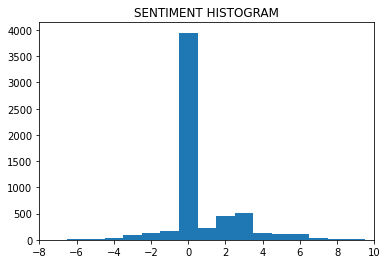

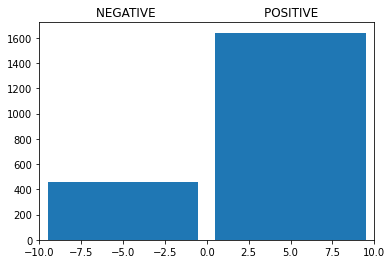

In [24]:
'''
*** First we can look at overall sentiment.
*** Here we will look at a histogram and a binary comparison (ignoring neutral).
'''
srange = (-8,10) # sentiment range (for plot)
sent.plotTotalSentiment(tweets,srange)

### Hashtag & Username Raw Sentiment

In [25]:
NORMALIZED = False
PLOT = True

#### Hashtags

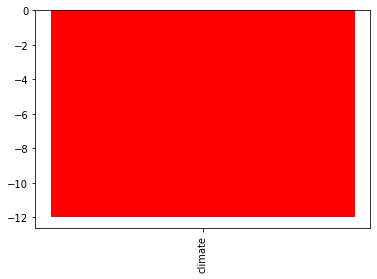

In [26]:
'''
*** Here we compute sentiment for each hashtag of interest.
'''
hashtags = ["climate"]
raw_htag_sent = sent.computeHashtagSentiment(tweets,hashtags,NORMALIZED,PLOT)

#### Usernames

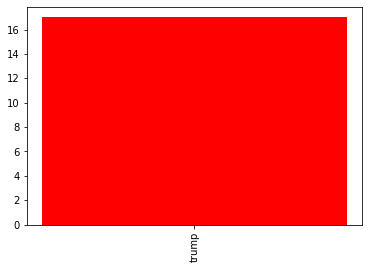

In [27]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = ["Trump"]
raw_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

### Hashtag & Username Normalized Sentiment

In [28]:
NORMALIZED = True

#### Hashtags

#### Usernames

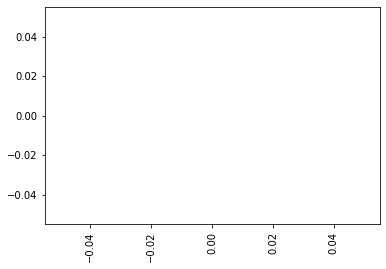

In [29]:
'''
*** Here we compute sentiment for each username of interest.
'''
usernames = []
norm_user_sent = sent.computeHashtagSentiment(tweets,usernames,NORMALIZED,PLOT)

## View Sentiment over Time

In [30]:
cldf_no_RT = sent.computeDataframeSentiment(cldf_no_RT)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


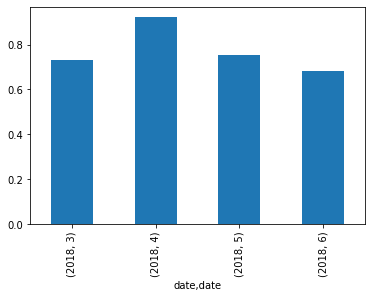

In [31]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
cldf_no_RT.sentiment.groupby([cldf_no_RT['date'].dt.year,cldf_no_RT["date"].dt.month]).mean().plot(kind="bar")

### Subset Sentiment by Date

## Compare Sentiment from Different Dataframes

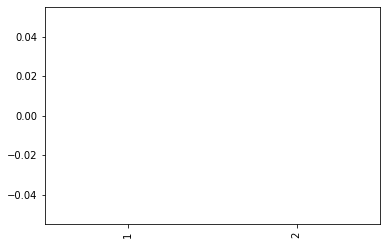

In [32]:
df_list = [bsdf,bpdf]
normalized = True
labels = ['1','2']
sent.compareSentimentByDataframe(df_list,normalized,labels)

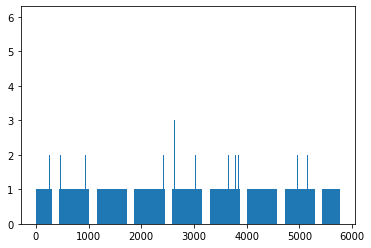

In [33]:
import matplotlib.pyplot as plt

unq = set(tweets)

freq = {uname: tweets.count(uname) for uname in unq}
plt.bar(range(len(unq)), freq.values())
plt.show()

In [34]:
from textblob import TextBlob
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')



def percentage(part,whole):
 return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []
noOfTweet = 1000

negativeCount=0
positiveCount=0
neutralCount=0

for tweet in tweets:
    tweet_list.append(tweet)
    analysis = TextBlob(tweet)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity


        
        
        
        
    if neg > pos:
        negativeCount+=1
        negative_list.append(tweet)
  
    elif pos > neg:
        positiveCount+=1
        positive_list.append(tweet)
    
    elif pos == neg:
        neutralCount+=1
        neutral_list.append(tweet)
        
    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    polarity = percentage(polarity, noOfTweet)
    positive = format(positiveCount, '.1f')
    negative = format(negativeCount, '.1f')
    neutral = format(neutralCount, '.1f')
    
print(positive)


/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.7) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rajuy/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1962.0


In [35]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))
tweet_list

total number:  6044
positive number:  1962
negative number:  549
neutral number:  3533


,0
0,[STREAM] 180330 KBS&lt;Music Bank&gt; เวลา 15.00 น.(ไทย) #GOT7 #EyesOnYou #LOOK►https://t.co/vjCT1ycCuU ►https://t.co/1VX55DNJn4►https://t.co/fF6eBFqiFZ https://t.co/9omvZQZw2I
1,2 minutes😭💔💔#WelcomeOliviaHye
2,Poppies.. 🌿🌺🌿🌺🌿🌺 #LovelyEvening https://t.co/dYiocpuiX1
3,#Repost bts.0ffcial (get_repost)・・・JIKOOK or TAEKOOK ?❤.....#BTS #BangtanSonyeondan… https://t.co/LdPytufdo1
4,Look - GOT7https://t.co/VrzKFobSes#GOT7 #갓세븐#EyesOnYou#Look
...,...
6039,[HQ] 1806029 #CHANYEOL #찬열Cr: Playing With Firehttps://t.co/mzqLlzwHarhttps://t.co/0IRlRuXAyShttps://t.co/yxTfHZuuXY#EXO #엑소 @weareoneEXO https://t.co/vvsNXhXFUI
6040,RT RT mikeshapirodrum #KCAMexico #KCAArgentina #DemiLovato #EchameLaCulpa #SofiaReyes #SofiaReyesTrendy #JBalvin
6041,[HQ] 180608 #Yebin #Uni_T fansign @ Kobacco Hall (3)#백예빈 #예빈 #다이아 #DIA #유니티 #UNIT @dia_official @official_uni_T https://t.co/XuTnGIAMsG
6042,Gain 1000 more followers in 35 mins!!✓Retweet to get followed✓ Follow everybody who follows youLet's GO 🔥#GainWithPyeWaw


32.46194573130377 9.083388484447386 58.45466578424884


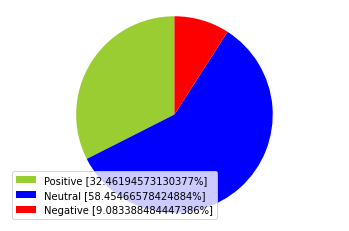

In [36]:
positive_percentage = len(positive_list)/len(tweet_list)*100
negative_percentage = len(negative_list)/len(tweet_list)*100
neutral_percentage = len(neutral_list)/len(tweet_list)*100
print(positive_percentage,negative_percentage, neutral_percentage )
labels = ['Positive ['+str(positive_percentage)+'%]' , 'Neutral ['+str(neutral_percentage)+'%]','Negative ['+str(negative_percentage)+'%]']
sizes = [positive_percentage, neutral_percentage, negative_percentage]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.axis('equal')
plt.show()